# Imports

In [11]:
import os
import pandas as pd
import networkx as nx
from tqdm.auto import tqdm
import timeit
import matplotlib 
matplotlib.rcParams['text.usetex'] = False
font = {'family' : 'serif',
        'weight' : 'bold',
        'size'   : 22}
matplotlib.rc('font', **font)
#matplotlib.rcParams['text.latex.preamble'] = r'\boldmath'


In [2]:
from valentine import valentine_match, valentine_metrics
from valentine.algorithms import Coma

In [3]:
from relic.utils.serialize import build_df_dict_dir

# Dataset Setup

In [15]:
csv_dir = ''/Users/suhail/mnt/roscoe/data/relic/matfreq2/'20220125-135017/artifacts/'
gt_graph_file = '/Users/suhail/mnt/roscoe/data/relic/matfreq2/20220125-135017/20220125-135017_gt_fixed.pkl'
gt_graph = nx.read_gpickle(gt_graph_file)
dfs = build_df_dict_dir(csv_dir)
dfs.keys(), gt_graph.edges()

Loading DFs:   0%|          | 0/40 [00:00<?, ?it/s]

(dict_keys(['020.csv', '027.csv', '029.csv', '012.csv', '015.csv', '004.csv', '003.csv', '038.csv', '036.csv', '031.csv', '014.csv', '013.csv', '028.csv', '026.csv', '021.csv', '030.csv', '037.csv', '039.csv', '002.csv', '005.csv', '034.csv', '033.csv', '008.csv', '006.csv', '001.csv', '010.csv', '017.csv', '019.csv', '022.csv', '025.csv', '000.csv', '007.csv', '009.csv', '032.csv', '035.csv', '024.csv', '023.csv', '018.csv', '016.csv', '011.csv']),
 OutEdgeView([('000.csv', '001.csv'), ('000.csv', '003.csv'), ('000.csv', '015.csv'), ('000.csv', '023.csv'), ('001.csv', '007.csv'), ('001.csv', '017.csv'), ('001.csv', '018.csv'), ('001.csv', '031.csv'), ('002.csv', '003.csv'), ('002.csv', '004.csv'), ('002.csv', '016.csv'), ('003.csv', '005.csv'), ('003.csv', '028.csv'), ('003.csv', '034.csv'), ('004.csv', '006.csv'), ('004.csv', '012.csv'), ('004.csv', '022.csv'), ('005.csv', '010.csv'), ('005.csv', '011.csv'), ('006.csv', '014.csv'), ('007.csv', '008.csv'), ('007.csv', '009.csv'), ('00

# Valentine Schema Matching Area

In [4]:
matcher = Coma(strategy="COMA_OPT")
matches = valentine_match(dfs['000.csv'], dfs['001.csv'], matcher)
matches

NameError: name 'dfs' is not defined

# Result Analysis

In [12]:
def get_df_pair_ground_truth(df1,df2):
    common_columns = set(df1.columns).intersection(set(df2.columns))
    return [(x,x) for x in common_columns]
# If ground truth available valentine could calculate the metrics
# ground_truth = [('Cited by', 'Cited by'),
#                    ('Authors', 'Authors'),
#                    ('EID', 'EID')]

ground_truth = get_df_pair_ground_truth(dfs['000.csv'], dfs['001.csv'])

metrics = valentine_metrics.all_metrics(matches, ground_truth)

print(metrics)



{'precision': 1.0, 'recall': 1.0, 'f1_score': 1.0, 'precision_at_10_percent': 1.0, 'precision_at_30_percent': 1.0, 'precision_at_50_percent': 1.0, 'precision_at_70_percent': 1.0, 'precision_at_90_percent': 1.0, 'recall_at_sizeof_ground_truth': 1.0}


# Core Experiment

In [10]:
def get_df_pair_ground_truth(df1,df2):
    common_columns = set(df1.columns).intersection(set(df2.columns))
    return [(x,x) for x in common_columns]

def evaluate_dir(base_dir, nb_name, matcher, matcher_label):
    csv_dir = f"{base_dir}/{nb_name}/artifacts/"
    graph_file = f"{base_dir}/{nb_name}/{nb_name}_gt_fixed.pkl"
    gt_graph = nx.read_gpickle(graph_file)
    dfs = build_df_dict_dir(csv_dir)
    results = []
    
    for u,v, e_data in tqdm(list(gt_graph.edges(data=True)), desc=f'Pairwise {matcher_label}', leave=False):
        ground_truth_col_match = get_df_pair_ground_truth(dfs[u],dfs[v])
        start_time = timeit.default_timer()
        matches = valentine_match(dfs[u], dfs[v], matcher)
        end_time = timeit.default_timer()
        
        metrics = valentine_metrics.all_metrics(matches, ground_truth_col_match)
        results.append({'nb_name': nb_name,
                        'matcher' : matcher_label,
                        'edge': frozenset((u,v)),
                        **metrics,
                        **e_data,
                       'runtime': end_time - start_time})
    
    return pd.DataFrame(results)

In [7]:
base_dir = '/Users/suhail/mnt/roscoe/data/relic/matfreq2/'
realworld_base_dir = '/Users/suhail/mnt/roscoe/data/relic/real-world'
realworld_nb = 'titanic'
nb_name = '20220125-135017'

In [24]:
r_df = evaluate_dir(base_dir, nb_name, matcher, "COMA")
r_df

  0%|          | 0/40 [00:00<?, ?it/s]

,nb_name,matcher,edge,precision,recall,f1_score,precision_at_10_percent,precision_at_30_percent,precision_at_50_percent,precision_at_70_percent,precision_at_90_percent,recall_at_sizeof_ground_truth,operation
0,20220125-135017,COMA,"(000.csv, 001.csv)",1.0,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,"[(groupby, {'group_cols': ['gPlAI_random_lower..."
1,20220125-135017,COMA,"(003.csv, 000.csv)",1.0,0.550000,0.709677,1.0,1.0,1.0,1.0,1.0,1.0,"[point_edit, {'col': 'IXEuF_first_name', 'old_..."
2,20220125-135017,COMA,"(000.csv, 015.csv)",1.0,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,"[(groupby, {'group_cols': ['QUJOh_last_name_fe..."
3,20220125-135017,COMA,"(000.csv, 023.csv)",1.0,0.578947,0.733333,1.0,1.0,1.0,1.0,1.0,1.0,"[(dropcol, {'col': 'YPTE6_tld'}), (sample, {'f..."
4,20220125-135017,COMA,"(007.csv, 001.csv)",1.0,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,"[(sample, {'frac': 0.63}), (point_edit, {'col'..."
5,20220125-135017,COMA,"(017.csv, 001.csv)",1.0,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,"[(sample, {'frac': 0.82}), (point_edit, {'col'..."
6,20220125-135017,COMA,"(001.csv, 018.csv)",1.0,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,"[(sample, {'frac': 0.71}), (sample, {'frac': 0..."
7,20220125-135017,COMA,"(001.csv, 031.csv)",1.0,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,"[(sample, {'frac': 0.56}), (dropcol, {'col': '..."
8,20220125-135017,COMA,"(002.csv, 003.csv)",1.0,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,"[(merge, {'on': 'SegtR_sha1'})]"
9,20220125-135017,COMA,"(002.csv, 004.csv)",1.0,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,"[(dropcol, {'col': 'SegtR_sha1'}), (sample, {'..."


In [11]:
r_df = evaluate_dir(realworld_base_dir , realworld_nb, matcher, "COMA")
r_df

Loading DFs:   0%|          | 0/13 [00:00<?, ?it/s]

Pairwise COMA:   0%|          | 0/12 [00:00<?, ?it/s]

,nb_name,matcher,edge,precision,recall,f1_score,precision_at_10_percent,precision_at_30_percent,precision_at_50_percent,precision_at_70_percent,precision_at_90_percent,recall_at_sizeof_ground_truth,operation,runtime
0,titanic,COMA,"(df_train_embarked.csv, df_train_sval.csv)",1.0,0.307692,0.470588,1.0,1.0,1.0,1.0,1.0,1.0,columnvalmapping,6.451626
1,titanic,COMA,"(df_train.csv, pclass_xt.csv)",0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,crosstab,3.750896
2,titanic,COMA,"(df_train.csv, df_train_sval.csv)",1.0,0.833333,0.909091,1.0,1.0,1.0,1.0,1.0,1.0,derived column,5.856028
3,titanic,COMA,"(df_train.csv, sex_val_xt.csv)",0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,crosstab,3.832089
4,titanic,COMA,"(df_train_drop2.csv, df_train_drop.csv)",1.0,0.888889,0.941176,1.0,1.0,1.0,1.0,1.0,1.0,dropcols,5.790363
5,titanic,COMA,"(df_train_family.csv, df_train_age_corrected.csv)",1.0,0.555556,0.714286,1.0,1.0,1.0,1.0,1.0,1.0,newcol,8.253329
6,titanic,COMA,"(df_train_embarked.csv, df_train_embarked_corr...",1.0,0.285714,0.444444,1.0,1.0,1.0,1.0,1.0,1.0,point_correction,6.541840
7,titanic,COMA,"(sex_val_xt.csv, sex_val_xt_pct.csv)",1.0,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,normalize,1.161746
8,titanic,COMA,"(pclass_xt.csv, pclass_xt_pct.csv)",1.0,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,normalize,1.168581
9,titanic,COMA,"(df_train_embarked_added.csv, df_train_embarke...",1.0,0.428571,0.600000,1.0,1.0,1.0,1.0,1.0,1.0,newcol,6.967275


# Testing Other Schema Matchers


In [12]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /Users/suhail/nltk_data...
[nltk_data]   Unzipping corpora/omw-1.4.zip.


True

In [16]:
from valentine.algorithms import DistributionBased
matcher = DistributionBased()
matches = valentine_match(dfs['000.csv'], dfs['001.csv'], matcher)
matches

/Users/suhail/opt/anaconda3/envs/valentine/lib/python3.9/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)


{(('table_1', 'gPlAI_random_lowercase_letter'),
  ('table_2', 'gPlAI_random_lowercase_letter')): 0.9936318726295474,
 (('table_1', '2CGXX_linux_platform_token'),
  ('table_2', '2CGXX_linux_platform_token')): 0.9891196788574321}

# Complete Results Analysis

In [82]:
import os
import glob


base_dir = '/Users/suhail/mnt/roscoe/data/relic/real-world/'
realworld_nb = 'titanic'


workflow_ids = sorted([d for d in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, d))])
valentine_results = []

for i in tqdm(workflow_ids):
    for r_csv_file in glob.glob(f"{base_dir}/{i}/inferred/valentine*.csv"):
        valentine_results.append(pd.read_csv(r_csv_file, index_col=0))
        
vdf = pd.concat(valentine_results).reset_index(drop=True)
vdf

  0%|          | 0/10 [00:00<?, ?it/s]

,nb_name,matcher,edge,precision,recall,f1_score,precision_at_10_percent,precision_at_30_percent,precision_at_50_percent,precision_at_70_percent,precision_at_90_percent,recall_at_sizeof_ground_truth,operation,runtime
0,agri-mex,sf,"frozenset({'HSdf.csv', 'HSdf__1.csv'})",1.0,1.000000,1.000000,1.000000,0.666667,0.400000,0.285714,0.222222,1.0,filter,0.075743
1,agri-mex,sf,"frozenset({'HSdf__1.csv', 'AtlasHS.csv'})",1.0,1.000000,1.000000,1.000000,0.800000,0.500000,0.333333,0.266667,1.0,NaN,0.076893
2,agri-mex,sf,"frozenset({'AtlasHSWithMexMerge.csv', 'AtlasHS...",1.0,1.000000,1.000000,0.800000,0.266667,0.166667,0.117647,0.090909,1.0,merge,0.207244
3,agri-mex,sf,"frozenset({'MexHS__1.csv', 'MexHS.csv'})",1.0,1.000000,1.000000,1.000000,0.360000,0.219512,0.157895,0.123288,1.0,NaN,0.476669
4,agri-mex,sf,"frozenset({'AtlasHSWithMexMerge.csv', 'MexHS__...",1.0,1.000000,1.000000,0.818182,0.272727,0.166667,0.118421,0.091837,1.0,merge,0.606274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492,titanic,coma,"frozenset({'sex_val_xt.csv', 'sex_val_xt_pct.c...",1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,normalize,0.748516
493,titanic,coma,"frozenset({'pclass_xt_pct.csv', 'pclass_xt.csv'})",1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,normalize,0.757962
494,titanic,coma,"frozenset({'df_train_embarked_corrected.csv', ...",1.0,0.428571,0.600000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,newcol,1.554187
495,titanic,coma,"frozenset({'df_train_drop.csv', 'df_train_fami...",1.0,0.642857,0.782609,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,dropcols,1.439078


In [30]:
grouped = vdf.loc[vdf.matcher != 'COMA_OPT'].groupby(['operation','matcher']).mean().reset_index()
grouped

,operation,matcher,precision,recall,f1_score,precision_at_10_percent,precision_at_30_percent,precision_at_50_percent,precision_at_70_percent,precision_at_90_percent,recall_at_sizeof_ground_truth,runtime
0,add features,coma,1.000000,0.538462,0.700000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.817226
1,add features,jlm,1.000000,1.000000,1.000000,0.351146,0.117631,0.070601,0.050436,0.039246,0.461538,8.711287
2,add features,sf,1.000000,1.000000,1.000000,0.287457,0.096672,0.058150,0.041580,0.032347,1.000000,4.028987
3,apply,coma,1.000000,0.713506,0.822914,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.374060
4,apply,cupid,0.884481,1.000000,0.935841,0.925000,0.944203,0.738621,0.529146,0.419423,0.931696,990.210445
...,...,...,...,...,...,...,...,...,...,...,...,...
95,split,sf,1.000000,0.826923,0.867647,0.408731,0.136467,0.081907,0.058513,0.045514,1.000000,9.237466
96,value transform,coma,0.500000,0.352941,0.413793,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,3.280215
97,value transform,cupid,0.233333,0.205882,0.218750,0.333333,0.220588,0.133929,0.096154,0.075000,0.323529,34.977544
98,value transform,jlm,0.500000,0.441176,0.468750,0.416667,0.138889,0.084270,0.060484,0.046875,0.441176,8.658327


In [28]:
!pip install seaborn

     |████████████████████████████████| 292 kB 2.1 MB/s eta 0:00:01


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'filter'),
  Text(1, 0, 'merge'),
  Text(2, 0, 'isnull'),
  Text(3, 0, 'value transform'),
  Text(4, 0, 'scaled transform'),
  Text(5, 0, 'projection'),
  Text(6, 0, 'dropped columns'),
  Text(7, 0, 'sort'),
  Text(8, 0, 'rename column'),
  Text(9, 0, 'new derived column'),
  Text(10, 0, 'groupby'),
  Text(11, 0, 'apply'),
  Text(12, 0, 'dropcol'),
  Text(13, 0, 'drop'),
  Text(14, 0, 'sample'),
  Text(15, 0, 'pivot'),
  Text(16, 0, 'concat'),
  Text(17, 0, 'select'),
  Text(18, 0, 'drop cols'),
  Text(19, 0, 'split'),
  Text(20, 0, 'add features'),
  Text(21, 0, 'drop col'),
  Text(22, 0, 'columnvalmapping'),
  Text(23, 0, 'crosstab'),
  Text(24, 0, 'derived column'),
  Text(25, 0, 'dropcols'),
  Text(26, 0, 'newcol'),
  Text(27, 0, 'point_correction'),
  Text(28, 0, 'normalize'),
  Text(29, 0, 'fillna')])

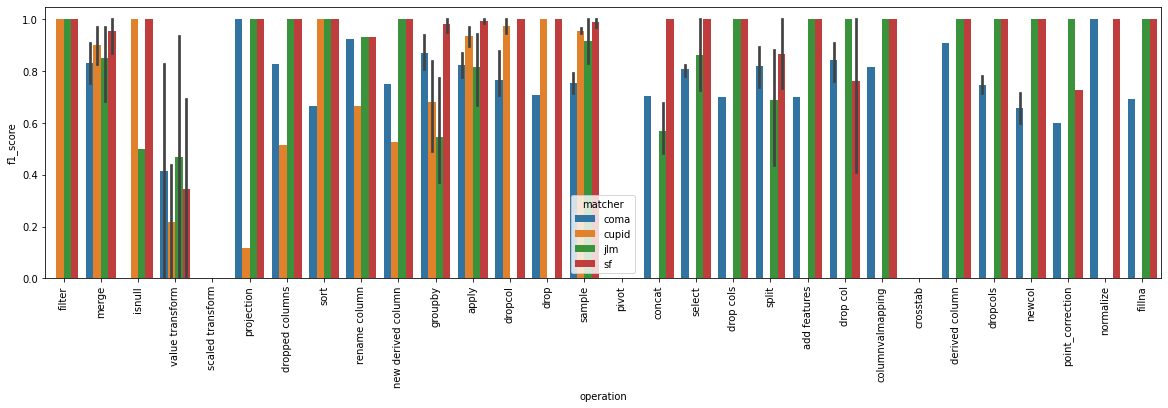

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20,5))
sns.barplot(x="operation", y="f1_score", hue="matcher",data=vdf.loc[vdf.matcher != 'COMA_OPT'].dropna(),
            hue_order=['coma','cupid', 'jlm', 'sf'], ax=ax)
plt.xticks(rotation = 90)

In [19]:
import os
import glob


base_dir = '/mnt/roscoe/data/relic/relic_datasets_vldb_2021/dataset_flat_exact/'
realworld_nb = 'titanic'


workflow_ids = sorted([d for d in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, d))])
valentine_results = []

for i in tqdm(workflow_ids):
    for r_csv_file in glob.glob(f"{base_dir}/{i}/inferred/valentine*.csv"):
        valentine_results.append(pd.read_csv(r_csv_file, index_col=0))
        
vdf = pd.concat(valentine_results).reset_index(drop=True)
vdf = vdf.loc[vdf.alpha.isnull()]

  0%|          | 0/200 [00:00<?, ?it/s]

In [20]:
grouped = vdf.loc[vdf.matcher != 'COMA_OPT'].groupby(['operation','matcher']).mean().reset_index()
grouped

,operation,matcher,precision,recall,f1_score,precision_at_10_percent,precision_at_30_percent,precision_at_50_percent,precision_at_70_percent,precision_at_90_percent,recall_at_sizeof_ground_truth,runtime,alpha,beta
0,assign,coma,1.000000,0.604340,0.742586,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.520319,NaN,NaN
1,assign,cupid,0.671578,1.000000,0.733478,0.685714,0.672801,0.458985,0.325380,0.256104,0.684127,915.598904,NaN,NaN
2,assign,jlm,0.998582,1.000000,0.999253,0.964342,0.951466,0.864489,0.712739,0.584789,0.952116,1843.243355,NaN,NaN
3,assign,sf,1.000000,0.955338,0.962961,0.689718,0.272920,0.172023,0.117687,0.093900,0.999637,2.387895,NaN,NaN
4,dropcol,coma,0.999944,0.649975,0.772800,0.997565,0.997292,0.997123,0.997111,0.997151,0.997123,2.493296,NaN,NaN
5,dropcol,cupid,0.632007,1.000000,0.732830,0.568403,0.589921,0.450141,0.317833,0.250828,0.549584,766.366788,NaN,NaN
6,dropcol,jlm,0.975811,0.996381,0.978203,0.953556,0.937155,0.895680,0.806601,0.703822,0.940111,1595.847042,NaN,NaN
7,dropcol,sf,1.000000,0.957357,0.963961,0.776552,0.324272,0.208137,0.140172,0.112904,1.000000,3.257713,NaN,NaN
8,groupby,coma,1.000000,0.682470,0.793513,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.240937,NaN,NaN
9,groupby,cupid,0.182051,1.000000,0.300144,0.000000,0.081510,0.138202,0.097038,0.076431,0.000000,644.769046,NaN,NaN


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'point_edit'),
  Text(1, 0, 'dropcol'),
  Text(2, 0, 'merge'),
  Text(3, 0, 'sample'),
  Text(4, 0, 'groupby'),
  Text(5, 0, 'pivot'),
  Text(6, 0, 'assign')])

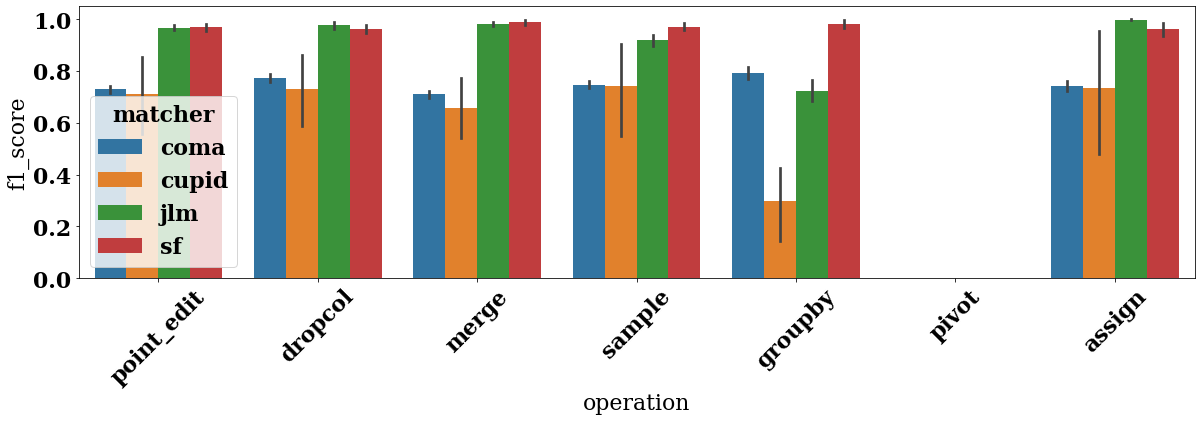

In [21]:
fig, ax = plt.subplots(figsize=(20,5))
sns.barplot(x="operation", y="f1_score", hue="matcher",data=vdf.loc[vdf.matcher != 'COMA_OPT'],
            hue_order=['coma','cupid', 'jlm', 'sf'], ax=ax)
plt.xticks(rotation = 45)

# Runtime Analysis

In [50]:
nc_vdf = vdf.loc[vdf.matcher != 'COMA_OPT']
nc_vdf

,nb_name,matcher,edge,precision,recall,f1_score,precision_at_10_percent,precision_at_30_percent,precision_at_50_percent,precision_at_70_percent,precision_at_90_percent,recall_at_sizeof_ground_truth,operation,args,runtime
0,20210126-153738,jlm,"frozenset({'1.csv', '0.csv'})",1.0,0.900000,0.947368,1.0,1.0,1.0,1.0,1.0,1.0,point_edit,"{'col': 'ipv4_network_class', 'old_value': 'c'...",0.662009
1,20210126-153738,jlm,"frozenset({'0.csv', '2.csv'})",1.0,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,dropcol,{'col': 'first_name'},0.543175
2,20210126-153738,jlm,"frozenset({'0.csv', '4.csv'})",1.0,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,merge,{'key': 'safe_email'},1.788889
3,20210126-153738,jlm,"frozenset({'0.csv', '10.csv'})",1.0,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,dropcol,{'col': 'company_suffix'},0.640537
4,20210126-153738,jlm,"frozenset({'3.csv', '4.csv'})",1.0,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,merge,{'key': 'safe_email'},2.961227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3016,20210126-155148,coma,"frozenset({'16.csv', '11.csv'})",1.0,0.700000,0.823529,1.0,1.0,1.0,1.0,1.0,1.0,point_edit,"{'col': 'credit_card_expire', 'old_value': '01...",1.397152
3017,20210126-155148,coma,"frozenset({'14.csv', '13.csv'})",1.0,0.833333,0.909091,1.0,1.0,1.0,1.0,1.0,1.0,sample,{'frac': 0.75},1.602526
3018,20210126-155148,coma,"frozenset({'17.csv', '15.csv'})",1.0,0.333333,0.500000,1.0,1.0,1.0,1.0,1.0,1.0,point_edit,"{'col': 'randomize_nb_elements', 'old_value': ...",2.510197
3019,20210126-155148,coma,"frozenset({'15.csv', '18.csv'})",1.0,0.333333,0.500000,1.0,1.0,1.0,1.0,1.0,1.0,assign,"{'string_or_numeric': 'numeric', 'col': 'rando...",1.850566


In [51]:
set(nc_vdf.nb_name.values)

{'20210126-153738',
 '20210126-153741',
 '20210126-153743',
 '20210126-153746',
 '20210126-153749',
 '20210126-153752',
 '20210126-153755',
 '20210126-153758',
 '20210126-153800',
 '20210126-153804',
 '20210126-153808',
 '20210126-153811',
 '20210126-153817',
 '20210126-153820',
 '20210126-153825',
 '20210126-153828',
 '20210126-153832',
 '20210126-153836',
 '20210126-153842',
 '20210126-153845',
 '20210126-153850',
 '20210126-153900',
 '20210126-153905',
 '20210126-153914',
 '20210126-153923',
 '20210126-153945',
 '20210126-153957',
 '20210126-154001',
 '20210126-154006',
 '20210126-154011',
 '20210126-154016',
 '20210126-154128',
 '20210126-154258',
 '20210126-154410',
 '20210126-154435',
 '20210126-154502',
 '20210126-154801',
 '20210126-154842',
 '20210126-155003',
 '20210126-155148'}

In [57]:
config_df = pd.read_csv('dataset_flat_exact_config.csv', index_col=0)
new_data = config_df.artifacts3.str.split(',', expand=True)
new_data

,0,1,2
0,20,100,10
1,20,100,10
2,20,100,10
3,20,100,10
4,20,100,10
...,...,...,...
990,20,50000,20
991,20,50000,20
992,20,50000,20
993,20,50000,20


In [58]:
config_df['versions'] = new_data[0]
config_df['rows'] = new_data[1]
config_df['columns'] = new_data[2]

In [63]:
config_df = config_df.drop_duplicates().drop('artifacts3', axis=1)

In [66]:
runtime_df = nc_vdf.merge(config_df, on='nb_name')
runtime_df

,nb_name,matcher,edge,precision,recall,f1_score,precision_at_10_percent,precision_at_30_percent,precision_at_50_percent,precision_at_70_percent,precision_at_90_percent,recall_at_sizeof_ground_truth,operation,args,runtime,versions,rows,columns
0,20210126-153738,jlm,"frozenset({'1.csv', '0.csv'})",1.0,0.900000,0.947368,1.0,1.0,1.0,1.0,1.0,1.0,point_edit,"{'col': 'ipv4_network_class', 'old_value': 'c'...",0.662009,20,100,10
1,20210126-153738,jlm,"frozenset({'0.csv', '2.csv'})",1.0,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,dropcol,{'col': 'first_name'},0.543175,20,100,10
2,20210126-153738,jlm,"frozenset({'0.csv', '4.csv'})",1.0,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,merge,{'key': 'safe_email'},1.788889,20,100,10
3,20210126-153738,jlm,"frozenset({'0.csv', '10.csv'})",1.0,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,dropcol,{'col': 'company_suffix'},0.640537,20,100,10
4,20210126-153738,jlm,"frozenset({'3.csv', '4.csv'})",1.0,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,merge,{'key': 'safe_email'},2.961227,20,100,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2256,20210126-155148,coma,"frozenset({'16.csv', '11.csv'})",1.0,0.700000,0.823529,1.0,1.0,1.0,1.0,1.0,1.0,point_edit,"{'col': 'credit_card_expire', 'old_value': '01...",1.397152,20,50000,10
2257,20210126-155148,coma,"frozenset({'14.csv', '13.csv'})",1.0,0.833333,0.909091,1.0,1.0,1.0,1.0,1.0,1.0,sample,{'frac': 0.75},1.602526,20,50000,10
2258,20210126-155148,coma,"frozenset({'17.csv', '15.csv'})",1.0,0.333333,0.500000,1.0,1.0,1.0,1.0,1.0,1.0,point_edit,"{'col': 'randomize_nb_elements', 'old_value': ...",2.510197,20,50000,10
2259,20210126-155148,coma,"frozenset({'15.csv', '18.csv'})",1.0,0.333333,0.500000,1.0,1.0,1.0,1.0,1.0,1.0,assign,"{'string_or_numeric': 'numeric', 'col': 'rando...",1.850566,20,50000,10


In [72]:
runtime_grouped = runtime_df.groupby(['rows','columns', 'matcher', 'operation']).mean()[['runtime']].reset_index()
runtime_grouped

,rows,columns,matcher,operation,runtime
0,100,10,coma,assign,1.834844
1,100,10,coma,dropcol,2.000040
2,100,10,coma,groupby,2.011723
3,100,10,coma,merge,1.876946
4,100,10,coma,pivot,1.921165
...,...,...,...,...,...
86,50000,10,sf,groupby,0.962867
87,50000,10,sf,merge,2.395658
88,50000,10,sf,pivot,33.189649
89,50000,10,sf,point_edit,1.081412


In [74]:
runtime_pivoted = runtime_grouped.pivot(index=['rows', 'columns'], columns=['matcher', 'operation'], values='runtime')
runtime_pivoted

matcher            coma                                                     \
operation        assign   dropcol   groupby     merge     pivot point_edit   
rows  columns                                                                
100   10       1.834844  2.000040  2.011723  1.876946  1.921165   1.890412   
1000  10       2.339861  2.094186  2.104516  2.346695  2.041479   2.263345   
10000 10       1.775740  1.701545  1.759409  1.847649  1.994599   1.784585   
50000 10       2.667499  2.446591  2.494659  3.327126  9.587094   2.426881   

matcher                       cupid                          ...        jlm  \
operation        sample      assign     dropcol     groupby  ...      pivot   
rows  columns                                                ...              
100   10       1.901333  915.598904  766.366788  644.769046  ...   0.036348   
1000  10       1.994538         NaN         NaN         NaN  ...   0.055421   
10000 10       1.626239         NaN         NaN         NaN  ...   0.837367   
50000 10       2.366859         NaN         NaN         NaN  ...  11.762795   

matcher                                      sf                                \
operation      point_edit      sample    assign   dropcol   groupby     merge   
rows  columns                                                                   
100   10         1.153427    0.774592  1.078496  1.002309  0.614660  1.309511   
1000  10         6.027436    5.181377  1.885527  0.774439  0.601465  1.813812   
10000 10        15.926263   11.893593  0.453799  0.366846  0.452213  1.466936   
50000 10       207.477518  134.312776  1.663635  1.210670  0.962867  2.395658   

matcher                                        
operation          pivot point_edit    sample  
rows  columns                                  
100   10        0.408079   1.015945  1.092419  
1000  10        0.835091   0.786582  0.722595  
10000 10        4.641430   0.447957  0.469665  
50000 10       33.189649   1.081412  1.746460  

[4 rows x 28 columns]

In [75]:
runtime_pivoted[['coma']]

matcher            coma                                                     \
operation        assign   dropcol   groupby     merge     pivot point_edit   
rows  columns                                                                
100   10       1.834844  2.000040  2.011723  1.876946  1.921165   1.890412   
1000  10       2.339861  2.094186  2.104516  2.346695  2.041479   2.263345   
10000 10       1.775740  1.701545  1.759409  1.847649  1.994599   1.784585   
50000 10       2.667499  2.446591  2.494659  3.327126  9.587094   2.426881   

matcher                  
operation        sample  
rows  columns            
100   10       1.901333  
1000  10       1.994538  
10000 10       1.626239  
50000 10       2.366859

In [77]:
runtime_pivoted[['cupid']]

matcher             cupid                                                 \
operation          assign     dropcol     groupby       merge      pivot   
rows  columns                                                              
100   10       915.598904  766.366788  644.769046  688.757686  438.85402   
1000  10              NaN         NaN         NaN         NaN        NaN   
10000 10              NaN         NaN         NaN         NaN        NaN   
50000 10              NaN         NaN         NaN         NaN        NaN   

matcher                                
operation      point_edit      sample  
rows  columns                          
100   10       847.549806  1044.24912  
1000  10              NaN         NaN  
10000 10              NaN         NaN  
50000 10              NaN         NaN

In [78]:
runtime_pivoted[['jlm']]

matcher               jlm                                                 \
operation          assign     dropcol    groupby        merge      pivot   
rows  columns                                                              
100   10         1.249355    1.426147   0.282732     1.823604   0.036348   
1000  10        11.332245    8.492683   5.345921    17.725999   0.055421   
10000 10        31.966751   15.258460   0.766628   110.787817   0.837367   
50000 10       215.284125  311.198752  77.048847  2109.402365  11.762795   

matcher                                
operation      point_edit      sample  
rows  columns                          
100   10         1.153427    0.774592  
1000  10         6.027436    5.181377  
10000 10        15.926263   11.893593  
50000 10       207.477518  134.312776

In [79]:
runtime_pivoted[['sf']]

matcher              sf                                                      \
operation        assign   dropcol   groupby     merge      pivot point_edit   
rows  columns                                                                 
100   10       1.078496  1.002309  0.614660  1.309511   0.408079   1.015945   
1000  10       1.885527  0.774439  0.601465  1.813812   0.835091   0.786582   
10000 10       0.453799  0.366846  0.452213  1.466936   4.641430   0.447957   
50000 10       1.663635  1.210670  0.962867  2.395658  33.189649   1.081412   

matcher                  
operation        sample  
rows  columns            
100   10       1.092419  
1000  10       0.722595  
10000 10       0.469665  
50000 10       1.746460

# Perturbation Test Results

In [2]:
import os
import glob
import pandas as pd
from tqdm.auto import tqdm


base_dir = '/mnt/roscoe/data/relic/relic_datasets_vldb_2021/dataset_flat_exact/'
realworld_nb = 'titanic'


workflow_ids = sorted([d for d in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, d))])
valentine_results = []

for i in tqdm(workflow_ids):
    for r_csv_file in glob.glob(f"{base_dir}/{i}/inferred/valentine*.csv"):
        valentine_results.append(pd.read_csv(r_csv_file, index_col=0))
        
vdf = pd.concat(valentine_results).reset_index(drop=True)
vdf

  0%|          | 0/200 [00:00<?, ?it/s]

,nb_name,matcher,edge,precision,recall,f1_score,precision_at_10_percent,precision_at_30_percent,precision_at_50_percent,precision_at_70_percent,precision_at_90_percent,recall_at_sizeof_ground_truth,operation,args,runtime,alpha,prefix_change,beta
0,20210126-153738,jlm,"frozenset({'1.csv', '0.csv'})",1.0,0.9,0.947368,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,point_edit,"{'col': 'ipv4_network_class', 'old_value': 'c'...",0.662009,NaN,NaN,NaN
1,20210126-153738,jlm,"frozenset({'0.csv', '2.csv'})",1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,dropcol,{'col': 'first_name'},0.543175,NaN,NaN,NaN
2,20210126-153738,jlm,"frozenset({'0.csv', '4.csv'})",1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,merge,{'key': 'safe_email'},1.788889,NaN,NaN,NaN
3,20210126-153738,jlm,"frozenset({'0.csv', '10.csv'})",1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,dropcol,{'col': 'company_suffix'},0.640537,NaN,NaN,NaN
4,20210126-153738,jlm,"frozenset({'3.csv', '4.csv'})",1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,merge,{'key': 'safe_email'},2.961227,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114965,20210126-201524,sf,"frozenset({'40.csv', '43.csv'})",1.0,1.0,1.000000,1.000000,1.000000,0.600000,0.428571,0.333333,1.000000,point_edit,"{'col': 'uri_extension', 'old_value': '.asp', ...",0.030055,0.1,False,0.5
114966,20210126-201524,sf,"frozenset({'41.csv', '42.csv'})",1.0,1.0,1.000000,0.800000,0.266667,0.166667,0.117647,0.090909,1.000000,merge,{'key': 'sha1'},0.180144,0.1,False,0.5
114967,20210126-201524,sf,"frozenset({'41.csv', '45.csv'})",1.0,1.0,1.000000,1.000000,0.800000,0.500000,0.333333,0.266667,1.000000,sample,{'frac': 0.4},0.062440,0.1,False,0.5
114968,20210126-201524,sf,"frozenset({'46.csv', '42.csv'})",1.0,1.0,1.000000,0.714286,0.275000,0.166667,0.118280,0.092437,0.909091,dropcol,{'col': 'unix_device'},0.519391,0.1,False,0.5


In [3]:
cleaned = vdf.loc[vdf.matcher == 'sf'].dropna()
cleaned

,nb_name,matcher,edge,precision,recall,f1_score,precision_at_10_percent,precision_at_30_percent,precision_at_50_percent,precision_at_70_percent,precision_at_90_percent,recall_at_sizeof_ground_truth,operation,args,runtime,alpha,prefix_change,beta
19,20210126-153738,sf,"frozenset({'0.csv', '1.csv'})",1.000000,1.000000,1.000000,0.800000,0.333333,0.200000,0.142857,0.111111,0.800000,point_edit,"{'col': 'ipv4_network_class', 'old_value': 'c'...",0.612008,0.1,False,0.5
20,20210126-153738,sf,"frozenset({'0.csv', '2.csv'})",1.000000,0.777778,0.875000,0.777778,0.333333,0.200000,0.142857,0.111111,0.777778,dropcol,{'col': 'first_name'},0.541434,0.1,False,0.5
21,20210126-153738,sf,"frozenset({'0.csv', '4.csv'})",1.000000,1.000000,1.000000,0.555556,0.185185,0.111111,0.079365,0.061728,0.900000,merge,{'key': 'safe_email'},1.303910,0.1,False,0.5
22,20210126-153738,sf,"frozenset({'0.csv', '10.csv'})",0.888889,0.888889,0.888889,0.777778,0.333333,0.200000,0.142857,0.111111,0.777778,dropcol,{'col': 'company_suffix'},0.549148,0.1,False,0.5
23,20210126-153738,sf,"frozenset({'4.csv', '3.csv'})",1.000000,1.000000,1.000000,0.470588,0.183673,0.111111,0.078947,0.061644,0.777778,merge,{'key': 'safe_email'},1.105044,0.1,False,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114965,20210126-201524,sf,"frozenset({'40.csv', '43.csv'})",1.000000,1.000000,1.000000,1.000000,1.000000,0.600000,0.428571,0.333333,1.000000,point_edit,"{'col': 'uri_extension', 'old_value': '.asp', ...",0.030055,0.1,False,0.5
114966,20210126-201524,sf,"frozenset({'41.csv', '42.csv'})",1.000000,1.000000,1.000000,0.800000,0.266667,0.166667,0.117647,0.090909,1.000000,merge,{'key': 'sha1'},0.180144,0.1,False,0.5
114967,20210126-201524,sf,"frozenset({'41.csv', '45.csv'})",1.000000,1.000000,1.000000,1.000000,0.800000,0.500000,0.333333,0.266667,1.000000,sample,{'frac': 0.4},0.062440,0.1,False,0.5
114968,20210126-201524,sf,"frozenset({'46.csv', '42.csv'})",1.000000,1.000000,1.000000,0.714286,0.275000,0.166667,0.118280,0.092437,0.909091,dropcol,{'col': 'unix_device'},0.519391,0.1,False,0.5


In [4]:
alphas = set(cleaned.loc[vdf.matcher == 'sf'].alpha.values)
betas = set(cleaned.loc[vdf.matcher == 'sf'].beta.values)
prefixes = set(cleaned.loc[vdf.matcher == 'sf'].prefix_change.values)

alphas, betas, prefixes

({0.1, 0.2, 0.5, 0.75}, {0.1, 0.2, 0.5, 0.75}, {False})

In [5]:
vdf.loc[vdf.matcher == 'sf'].alpha.value_counts()

0.10    27004
0.20    27004
0.50    27004
0.75    27004
Name: alpha, dtype: int64

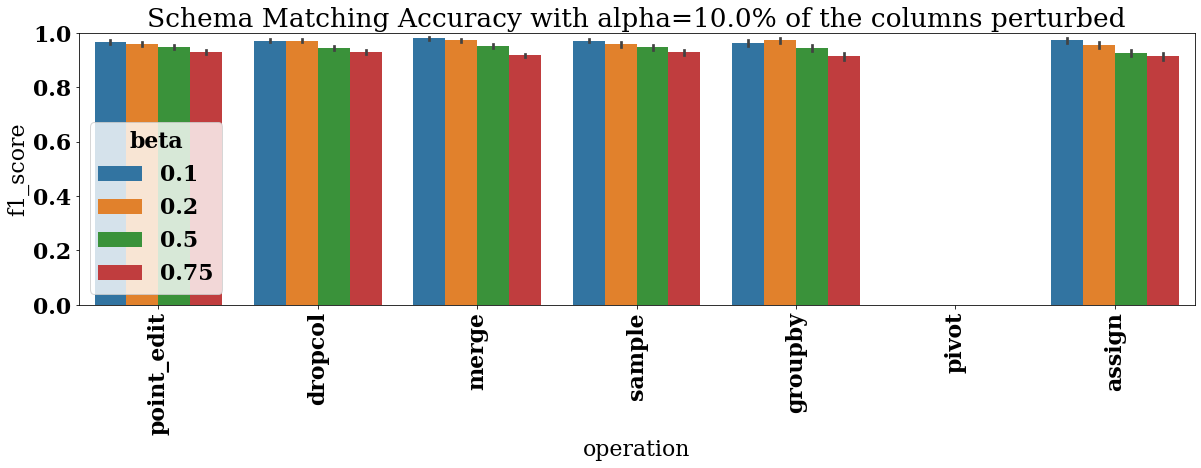

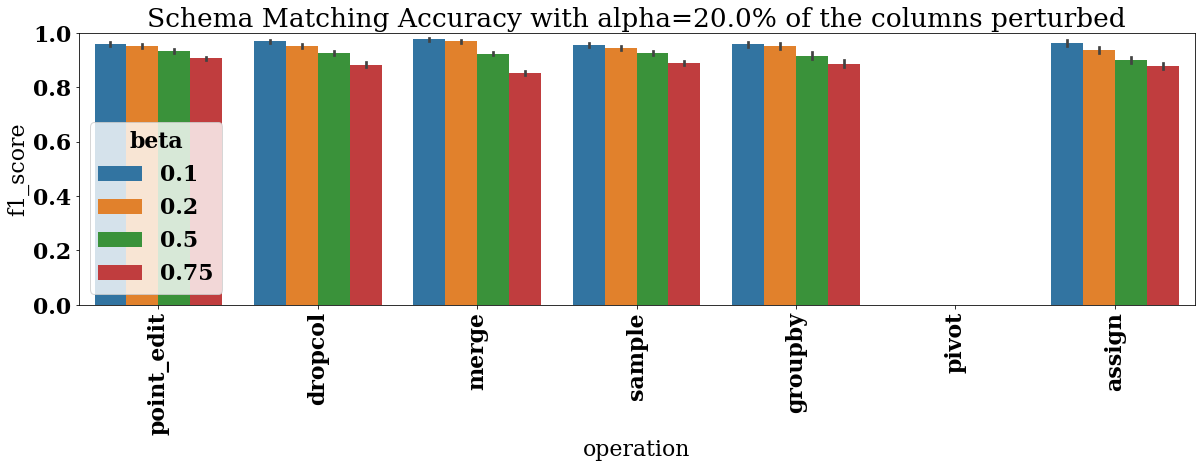

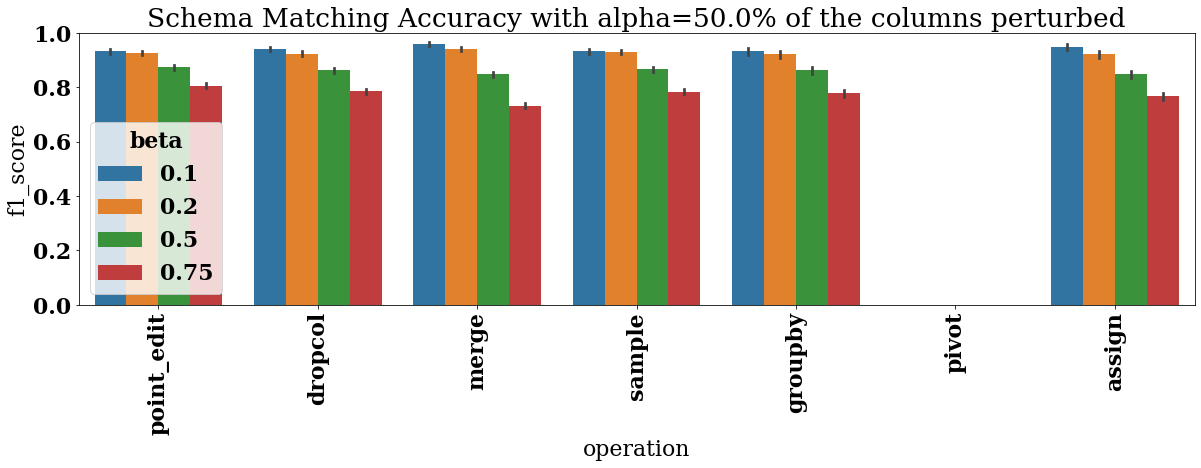

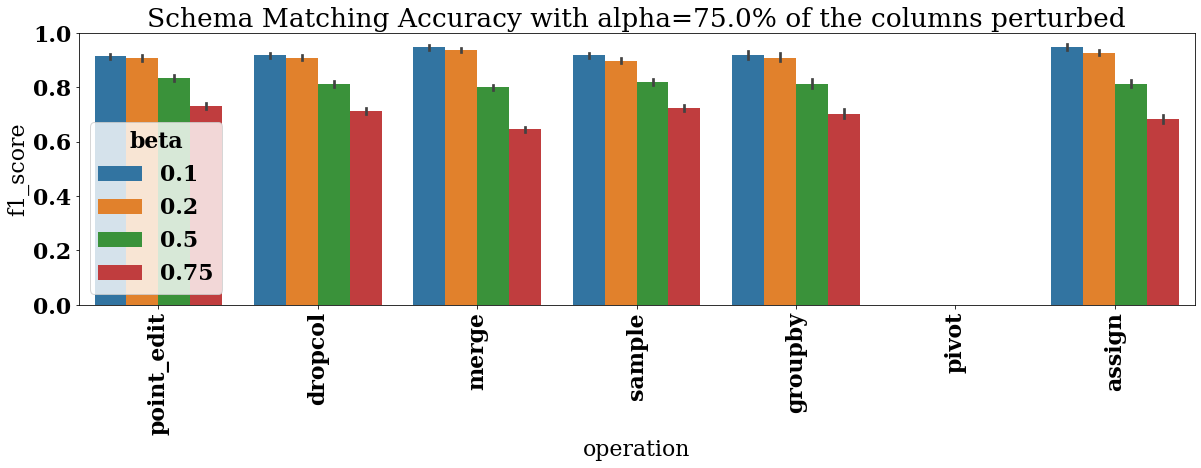

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt


for alpha in sorted(list(alphas)):
    fig, ax = plt.subplots(figsize=(20,5))
    sns.barplot(x="operation", y="f1_score", hue="beta", data=cleaned.loc[cleaned.alpha == alpha], ax=ax)
    plt.title(f'Schema Matching Accuracy with alpha={alpha*100}% of the columns perturbed')
    plt.xticks(rotation = 90)
    plt.ylim(0.0,1.0)

In [35]:
# %load ../scripts/valentine_test.py
_UNIQUE_DICTIONARY = string.ascii_letters+string.digits


def perturb_string(original_string, beta, prefix_change=False):
    if prefix_change:
        return generate_prefix()+'__'+original_string.split('__')[1]
    else:
        strlen = len(original_string)
        new_string=list(original_string)
        pertrub_idxs = np.random.randint(0, strlen, int(np.ceil(beta*strlen))).tolist()
        for ix in pertrub_idxs:
            new_string[ix] = np.random.choice(list(_UNIQUE_DICTIONARY), 1)[0]
        return "".join(new_string)



In [39]:
for beta in sorted([.1, .2, .5, .75]):
    print(perturb_string('AAAAAAAAAA', beta))

AAAAAAAA2A
09AAAAAAAA
1gAAwAAAwS
Ab9kJAAAUu


# Verify Beta Behavior


In [2]:
# %load '../scripts/valentine_test.py'
import pandas as pd
import networkx as nx
from tqdm.auto import tqdm
import timeit
import sys
import string
import numpy as np

from valentine import valentine_match, valentine_metrics
from valentine.algorithms import Coma, Cupid, DistributionBased, JaccardLevenMatcher, SimilarityFlooding

from relic.utils.serialize import build_df_dict_dir

algorithm_map = {
    'coma': Coma(strategy="COMA_OPT"),
    'cupid': Cupid(),
    'db': DistributionBased(),
    'jlm': JaccardLevenMatcher(),
    'sf': SimilarityFlooding(),
}


# SCHEMA PERTURBATION FUNCTIONS ####
_UNIQUE_DICTIONARY = string.ascii_letters+string.digits


# Schema Perturbation Function
def generate_prefix(symbol_dict: str=_UNIQUE_DICTIONARY, size: int=5) -> str:
    return ''.join(np.random.choice(list(symbol_dict), size))


def perturb_string(original_string, beta, prefix_change=False):
    if prefix_change:
        return generate_prefix()+'__'+original_string.split('__')[1]
    else:
        strlen = len(original_string)
        new_string=list(original_string)
        pertrub_idxs = np.random.randint(0, strlen, int(np.ceil(beta*strlen))).tolist()
        for ix in pertrub_idxs:
            new_string[ix] = np.random.choice(list(_UNIQUE_DICTIONARY), 1)[0]
        return "".join(new_string)


def perturb_schema(input_df, alpha=0.5, prefix_change=False, beta=0.2):
    original_column_set = set(input_df.columns)
    rename_map = {}
    cols_to_rename = np.random.choice(list(original_column_set), int(np.ceil(alpha*len(original_column_set))))

    for col_to_rename in cols_to_rename:
        rename_map[col_to_rename] = perturb_string(col_to_rename, beta=beta, prefix_change=prefix_change)

    return input_df.rename(columns=rename_map), rename_map


def get_df_pair_ground_truth(df1, df2, rename_map_df1=None, rename_map_df2=None):
    common_columns = set(df1.columns).intersection(set(df2.columns))
    if rename_map_df1 and rename_map_df2:
        return_list = []
        for col in common_cols:
            x = rename_map_df1[col] if x in rename_map_df1 else col
            y = rename_map_df2[col] if y in rename_map_df2 else col
            return_list.append((x,y))
        return return_list
    else:
        return [(x, x) for x in common_columns]


def evaluate_dir(base_dir, nb_name, matcher, matcher_label, alpha=None, prefix_change=False, beta=None):
    csv_dir = f"{base_dir}/{nb_name}/artifacts/"
    graph_file = f"{base_dir}/{nb_name}/{nb_name}_gt_fixed.pkl"
    gt_graph = nx.read_gpickle(graph_file)
    dfs = build_df_dict_dir(csv_dir)
    renamed_dfs = {}
    if alpha and beta:
        for label, df in dfs.items():
            renamed_df, rename_map = perturb_schema(df, alpha=alpha, prefix_change=prefix_change, beta=beta)
            renamed_dfs = {label: renamed_df}
            rename_col_map = {label: rename_map}

    results = []

    for u, v, e_data in tqdm(list(gt_graph.edges(data=True)), desc=f'Pairwise {matcher_label}', leave=False):
        if alpha and beta:
            ground_truth_col_match = get_df_pair_ground_truth(dfs[u], dfs[v], rename_map_df1=rename_col_map[u],
                                                             rename_map_df2=rename_col_map[v])
            start_time = timeit.default_timer()
            matches = valentine_match(renamed_dfs[u], renamed_dfs[v], matcher)
            end_time = timeit.default_timer()
        else:
            ground_truth_col_match = get_df_pair_ground_truth(dfs[u], dfs[v])
            start_time = timeit.default_timer()
            matches = valentine_match(dfs[u], dfs[v], matcher)
            end_time = timeit.default_timer()

        metrics = valentine_metrics.all_metrics(matches, ground_truth_col_match)
        results.append({'nb_name': nb_name,
                        'matcher': matcher_label,
                        'edge': frozenset((u, v)),
                        **metrics,
                        **e_data,
                        'runtime': end_time - start_time,
                        'alpha': alpha,
                        'prefix_change': prefix_change,
                        'beta': beta})

    return pd.DataFrame(results)


# if __name__ == '__main__':
#     bd = sys.argv[1]
#     nb = sys.argv[2]
#     output_file = sys.argv[3]
#     m = algorithm_map[sys.argv[4]]
#     alpha=None
#     prefix_change=None
#     beta=None
#     if len(sys.argv) > 5:
#        alpha = float(sys.argv[5])
#        prefix_change = (sys.argv[6] == 'true')
#        beta = float(sys.argv[7])
#     r_df = evaluate_dir(bd, nb, m, sys.argv[4], alpha, prefix_change, beta)
#     r_df.to_csv(output_file)


In [3]:
import pandas as pd
base_dir = '/mnt/roscoe/data/relic/relic_datasets_vldb_2021/dataset_flat_exact/20210126-153738/'

df1_file = '0.csv'
df2_file = '1.csv'

df1 = pd.read_csv(base_dir+'/artifacts/'+df1_file, index_col=0)
df2 = pd.read_csv(base_dir+'/artifacts/'+df2_file, index_col=0)

In [4]:
set(df1).intersection(df2)

{'company_email',
 'company_suffix',
 'cryptocurrency_code',
 'first_name',
 'free_email',
 'ipv4_network_class',
 'linux_processor',
 'numerify',
 'safe_email',
 'sentence'}

In [6]:
df1_new = perturb_schema(df1, alpha=0.5, prefix_change=False, beta=0.2)
df1_new

,company_suffix,safe_email,hree_Vmail,ipv4_network_class,XinuxWprocessor,nuVe9ify,first_name,cryptocurrency_code,company_email,sentence
0,Inc,danielwright@example.com,jeremywallace@gmail.com,c,i686,149.0,Caitlin,XRP,hamiltonjames@greene-munoz.com,Realize exist school.
1,PLC,jmccoy@example.net,davisjoseph@yahoo.com,a,x86_64,710.0,Maureen,PPC,gregory30@chandler.com,Us political stay eye.
2,PLC,david48@example.net,lopezjennifer@hotmail.com,c,i686,799.0,Jermaine,UBQ,briggsamber@weaver-ellis.com,View question dinner man.
3,Group,alvaradomichelle@example.org,james98@yahoo.com,b,x86_64,161.0,Amanda,IOTA,luis62@baker-bender.com,Follow town establish sign vote manager.
4,Ltd,michellemendoza@example.org,johnny66@gmail.com,c,x86_64,940.0,Abigail,LTC,alexandraharrington@harvey-ward.com,Free top arrive subject.
...,...,...,...,...,...,...,...,...,...,...
95,LLC,robert91@example.org,paul28@gmail.com,a,i686,561.0,Brenda,TRX,rogersjessica@nelson.com,Type staff project natural step.
96,Ltd,kara57@example.com,flemingthomas@gmail.com,c,i686,888.0,Natalie,PPC,ronaldhenson@manning-rodriguez.com,Radio early west land glass spring.
97,LLC,rosariomartin@example.org,hernandezsophia@gmail.com,b,x86_64,818.0,Martha,TIT,aharris@gutierrez.biz,Follow individual it attorney nature education.
98,LLC,jenniferjohnson@example.net,efloyd@hotmail.com,c,x86_64,833.0,Bradley,STC,carlgordon@taylor.com,Might cost company forward include buy.
